[source:oracle](https://oracleselixir.com/stats/teams/byTournament)

[source:wiki](https://lol.fandom.com/wiki/League_of_Legends_Esports_Wiki)

### Original data

In [1]:
import pandas as pd

yearStatForWorldsTeam = pd.read_excel('Team1vsTeam2_2019-2023.xlsx') #source: https://oracleselixir.com/stats/teams/byTournament

yearStatForWorldsTeam

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
342,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
343,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
344,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


In [2]:
df=yearStatForWorldsTeam
# 使用one-hot将队伍名称转换为二进制向量
df_encoded = pd.get_dummies(df, columns=['index'])

# 划分特征和目标变量
X = df_encoded.drop(['IsWin'], axis=1)  # 特征
y = df_encoded['IsWin']  # 目标变量

# 使用随机森林分类器进行特征选择
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# 获取特征的重要性得分
feature_importances = model.feature_importances_

# 创建特征重要性数据框
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 排序特征按其重要性得分
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



feature_importance_df.head(20)

,Feature,Importance
0,WR,0.069286
17,WPM,0.068243
16,JNG,0.063591
18,CWPM,0.062918
6,MLR,0.056480
13,ELD,0.051183
4,GSPD,0.051065
1,KD,0.050930
2,CKPM,0.050783
11,FD,0.044970


### Random Forest

删除DRG,gspd，bn，egr,MLR,GSPD,KD,GPR

KD (Kill-Death Ratio): 玩家击杀（Kill）与死亡（Death）的比率。这通常用于衡量玩家在游戏中的杀敌效率。

GSPD (Average gold spent percentage difference):
GSPD 用于衡量英雄联盟游戏中两支队伍（通常是红队和蓝队）之间的平均金币花费百分比的差异。这个指标可以用来评估哪支队伍在游戏中更有效地利用他们的金币，通常与经济优势相关。如果一个队伍的 GSPD 高，那么他们可能更有效地花费金币，这通常是一个积极的迹象，因为他们可能会在游戏中取得优势。

Win Rate (胜率): 玩家或团队在比赛中获胜的比率，通常以百分比表示。

FB (First Blood): 游戏中首次击杀敌人。通常，获得“First Blood”可以为团队带来优势。

CWPM:control wards purchased per minute:

GPR：gold percentage rating（average amount of game's total gold held,relative to 0.5):如果一个玩家或团队的 GPR 高于0.5，这通常被认为是有经济优势的表现。

BN (Baron Nashor Control Rate): Baron Nashor是游戏中的一个重要野怪，击杀它可以为团队带来重要的增益。控龙率。
FT (First Tower Rate): 游戏中首座摧毁的防御塔。通常，摧毁首座防御塔可以为团队带来地图控制和金币优势。

CKPM:average combined kills per minute(team kills+opponent kills):它表示每分钟的平均综合击杀数，包括团队的击杀和对手的击杀。这个指标用于衡量游戏中的动作和战斗强度。

FD (First Dragon Rate): 游戏中首次击杀的龙。击杀首条龙可能会给团队带来一些游戏内效益

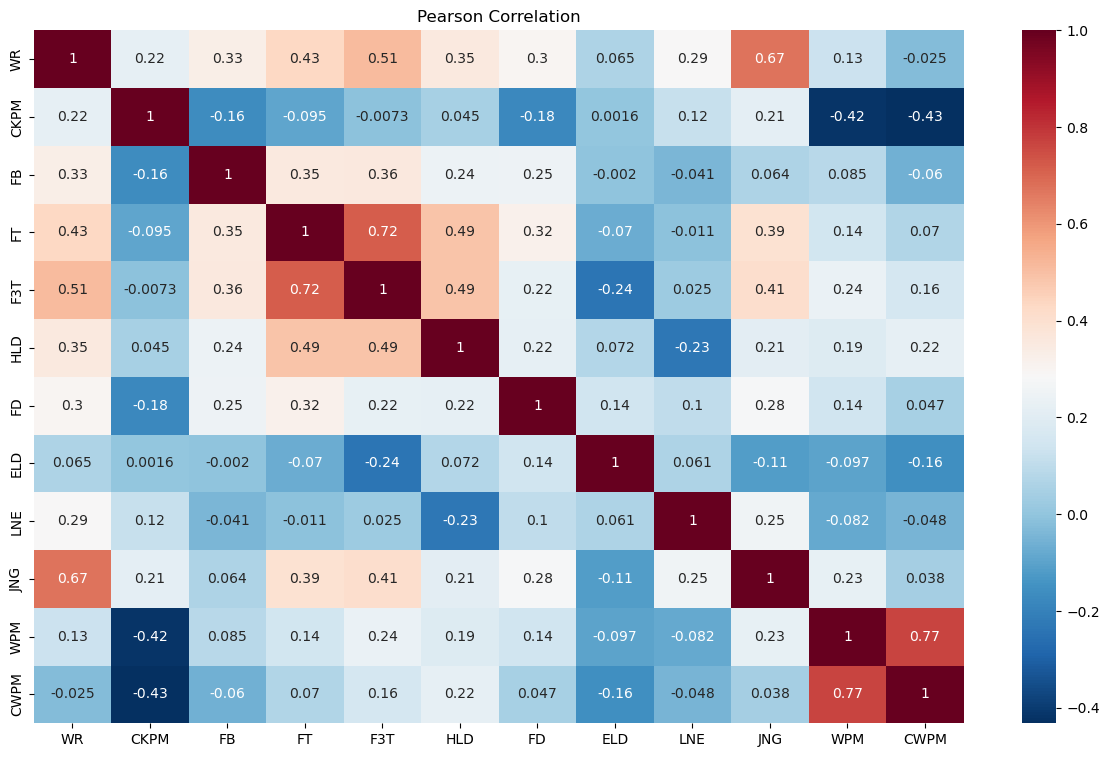

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = df.drop(columns = ['KD','GSPD','BN','EGR','MLR','BN','DRG','GPR'])
plt.figure(figsize = (15,9))
sns.heatmap(df1.iloc[:, 1:-1].corr(), annot = True, cmap = 'RdBu_r')
plt.title("Pearson Correlation")
plt.show()

In [4]:
df1

,index,WR,CKPM,FB,FT,F3T,HLD,FD,ELD,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,-0.02,-0.01,0.05,0.03,0.02,0.05,0.25,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,-0.18,0.00,-0.07,-0.03,0.12,0.10,0.00,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,-0.23,0.15,0.12,0.06,-0.05,-0.05,-0.40,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.05,0.01,-0.07,-0.19,-0.03,0.05,0.64,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.35,-0.10,0.08,0.03,0.10,-0.02,0.56,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,J Team,-0.109790,-0.20,-0.12,-0.09,-0.04,-0.05,-0.11,-0.09,0.000,-0.024,0.26,0.12,1
342,Dplus KIA,-0.070833,-0.02,-0.15,-0.03,-0.12,0.04,-0.11,-0.44,0.001,0.019,0.56,0.30,0
343,Invictus Gaming,0.103757,0.38,-0.23,0.04,-0.04,-0.10,-0.11,0.03,0.016,0.039,-0.54,-0.28,1
344,Royal Never Give Up,0.177327,0.12,0.03,-0.01,0.04,-0.10,0.16,0.51,-0.001,0.000,0.06,-0.10,1


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.03, 'max_depth': 30}
Best Accuracy:  0.6560846560846562


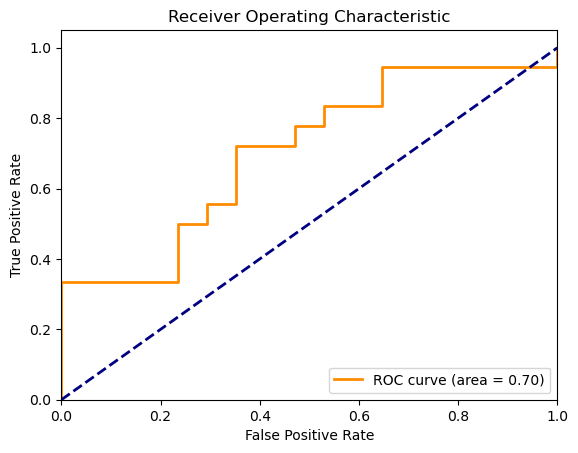

confusion matrix:
[[ 9  8]
 [ 5 13]]


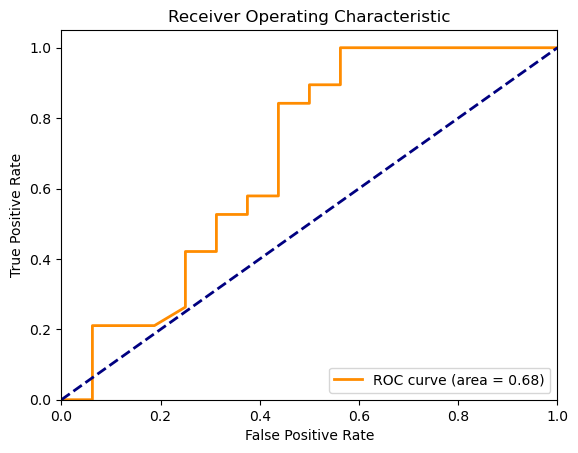

confusion matrix:
[[10  6]
 [ 8 11]]


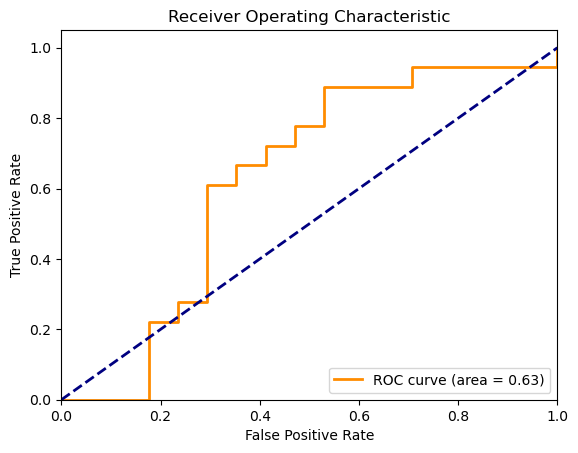

confusion matrix:
[[11  6]
 [ 7 11]]


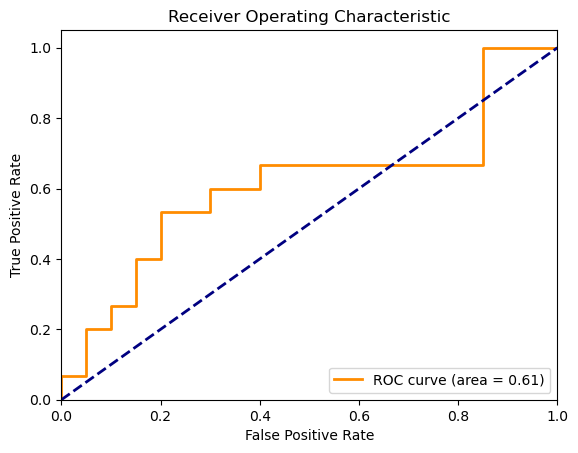

confusion matrix:
[[12  8]
 [ 6  9]]


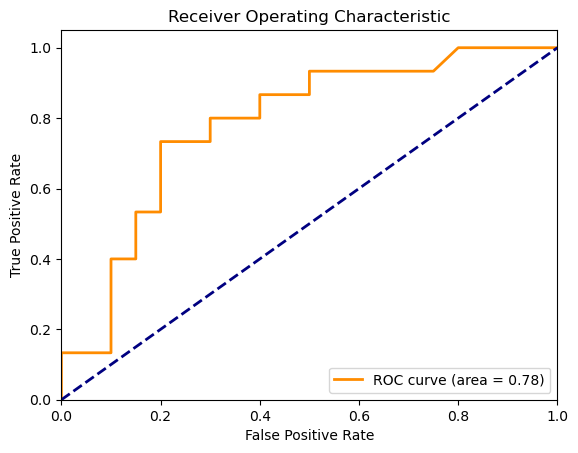

confusion matrix:
[[13  7]
 [ 3 12]]


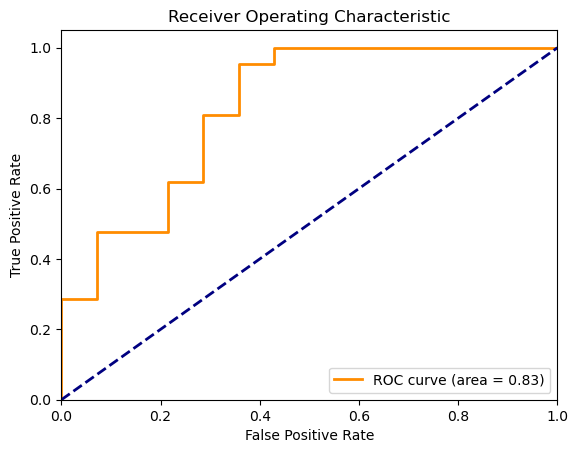

confusion matrix:
[[11  3]
 [ 8 13]]


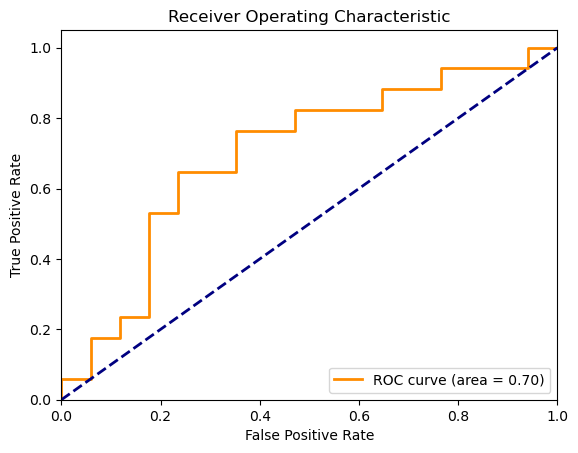

confusion matrix:
[[ 9  8]
 [ 4 13]]


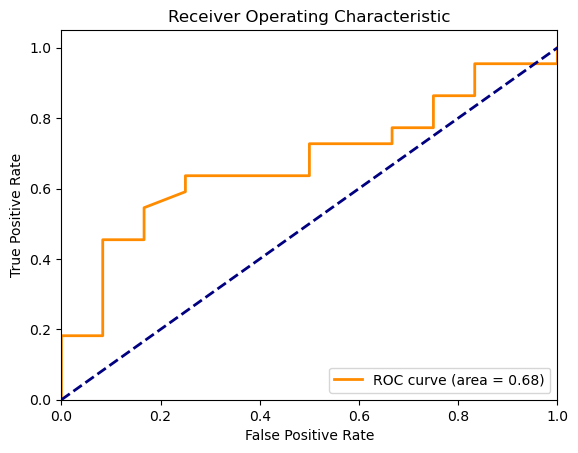

confusion matrix:
[[10  2]
 [10 12]]


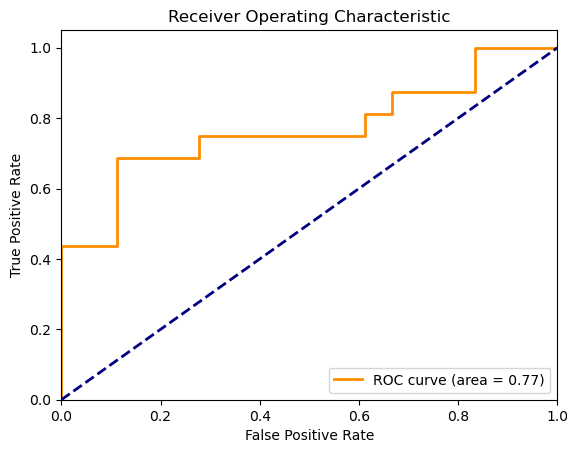

confusion matrix:
[[ 6 12]
 [ 2 14]]


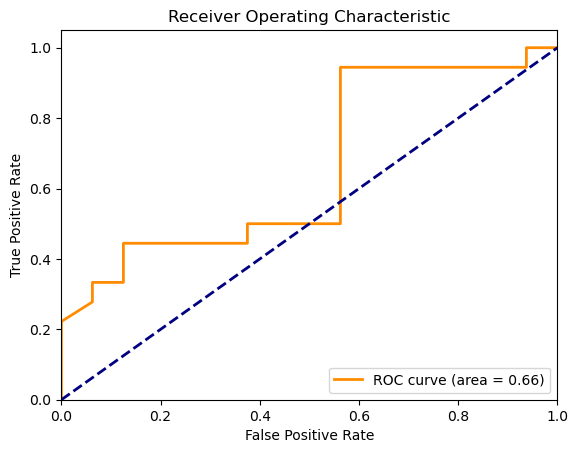

confusion matrix:
[[ 7  9]
 [ 7 11]]
accuracy: 0.6268907563025211
precision: 0.645130799283276
recall: 0.6727599859720602
F1: 0.647392549006326
AUC: 0.703814753420366


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
X = df1[['WR','CKPM','FB','FT','F3T','HLD','FD','ELD','LNE','JNG','WPM','CWPM']]
Y = df1['IsWin']

kf = KFold(n_splits=10, shuffle=True, random_state=42)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=1,
    class_weight='balanced')
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_impurity_decrease': np.arange(0.0, 0.4, 0.01)  
}
scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring=scorer, cv=kf, n_iter=10, random_state=42)
random_search.fit(X_train, Y_train)
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

rf_classifier = random_search.best_estimator_

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    rf_classifier.fit(X_train, Y_train)
    Y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    custom_threshold = 0.5
    Y_pred = (Y_prob >= custom_threshold).astype(int)
    accuracy_list.append(accuracy_score(Y_test, Y_pred))
    precision_list.append(precision_score(Y_test, Y_pred))
    recall_list.append(recall_score(Y_test, Y_pred))
    f1_list.append(f1_score(Y_test, Y_pred))
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)  
    roc_auc_list.append(roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("confusion matrix:")
    print(conf_matrix)

print("accuracy:", sum(accuracy_list) / len(accuracy_list))
print("precision:", sum(precision_list) / len(precision_list))
print("recall:", sum(recall_list) / len(recall_list))
print("F1:", sum(f1_list) / len(f1_list))
print("AUC:", sum(roc_auc_list) / len(roc_auc_list))





## Predict the Winner
According to the tournament system, we start with the 8-in-4 prediction, the Top 8 Bo5 (five games to three wins) matches of the 2023 Worlds will be Gen.G vs BLG, NRG vs WBG, the two winners of the four teams will play in the semi-finals, with the winners advancing to the finals; meanwhile, the two winners of JDG vs KT and LNG vs T1 will play in the semi-finals, with the winners advancing to the finals.

Since the loser of the previous game chooses either the blue or the red side for the next game, and according to the baseline model the blue side has a higher win rate than the red side, we assume that the team that loses in the previous game will choose the blue side in the next game, so we need to consider the case where the teams in the game are on both sides of the table.

# 8-in-4

In [22]:
year2023StatForWorldsTeam = pd.read_excel(r'year2023StatForWorldsTeam.xlsx') 
year2023StatForWorldsTeam.set_index("team", inplace = True)
year2023StatForWorldsTeam.rename(columns={"win rate": "WR"}, inplace=True)

selected_columns = year2023StatForWorldsTeam[["WR", "CKPM", "FB", "FT", "F3T", "HLD", "FD", "ELD", "LNE", "JNG", "WPM", "CWPM"]]
selected_columns

,WR,CKPM,FB,FT,F3T,HLD,FD,ELD,LNE,JNG,WPM,CWPM
team,,,,,,,,,,,,
Gen.G,0.726562,0.75,0.61,0.66,0.64,0.53,0.44,0.60,0.509,0.550,3.13,1.21
T1,0.611511,0.77,0.51,0.72,0.71,0.61,0.61,0.50,0.504,0.514,3.32,1.40
KT Rolster,0.694215,0.69,0.55,0.61,0.64,0.45,0.55,0.73,0.506,0.505,3.19,1.37
Dplus KIA,0.606061,0.67,0.58,0.53,0.54,0.54,0.62,0.44,0.499,0.522,3.40,1.52
JD Gaming,0.777778,0.86,0.52,0.55,0.65,0.43,0.50,0.00,0.511,0.553,3.31,1.25
Bilibili Gaming,0.641379,0.91,0.57,0.52,0.76,0.48,0.59,0.00,0.502,0.531,3.32,1.32
LNG Esports,0.651786,0.81,0.61,0.40,0.60,0.60,0.60,0.00,0.504,0.505,3.14,1.34
Weibo Gaming,0.607843,0.82,0.45,0.67,0.67,0.50,0.67,0.00,0.506,0.520,3.21,1.39
G2 Esports,0.705263,1.02,0.48,0.61,0.57,0.64,0.60,1.00,0.500,0.539,3.15,0.95


In [23]:
# GenG in Blue
GenG_vs_BLG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["Bilibili Gaming"]].squeeze())
# BlG in Blue
BLG_vs_GenG = selected_columns.loc[["Bilibili Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())

# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_BLG)
BLG_WR = rf_classifier.predict(BLG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR, '; the Winning Rate for BLG in the blue side is ', BLG_WR)

The Winning Rate for Gen.G in the blue side is  [1] ; the Winning Rate for BLG in the blue side is  [0]


GenG win

In [24]:
# NRG in Blue
NRG_vs_WBG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())
# WBG in Blue
WBG_vs_NRG = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = rf_classifier.predict(NRG_vs_WBG)
WBG_WR = rf_classifier.predict(WBG_vs_NRG)


print('The Winning Rate for NRG in the blue side is ', NRG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)

The Winning Rate for NRG in the blue side is  [0] ; the Winning Rate for WBG in the blue side is  [1]


WBG win


In [25]:
# JDG in Blue
JDG_vs_KT = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["KT Rolster"]].squeeze())
# KT in Blue
KT_vs_JDG = selected_columns.loc[["KT Rolster"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())

# Predict the Winning Rate
JDG_WR = rf_classifier.predict(JDG_vs_KT)
KT_WR = rf_classifier.predict(KT_vs_JDG)


print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for KT in the blue side is ', KT_WR)

The Winning Rate for JDG in the blue side is  [1] ; the Winning Rate for KT in the blue side is  [0]


JDG win

In [26]:
# LNG in Blue
LNG_vs_T1 = selected_columns.loc[["LNG Esports"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_LNG = selected_columns.loc[["T1"]].sub(selected_columns.loc[["LNG Esports"]].squeeze())

# Predict the Winning Rate
LNG_WR = rf_classifier.predict(LNG_vs_T1)
T1_WR = rf_classifier.predict(T1_vs_LNG)
print('The Winning Rate for LNG in the blue side is ', LNG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for LNG in the blue side is  [0] ; the Winning Rate for T1 in the blue side is  [1]


T1 win

# semifinals¶

In [27]:
# GenG in Blue
GenG_vs_WBG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())
# WBG in Blue
WBG_vs_GenG = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())
# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_WBG)
WBG_WR = rf_classifier.predict(WBG_vs_GenG)
print('The Winning Rate for GenG in the blue side is ', GenG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)


The Winning Rate for GenG in the blue side is  [1] ; the Winning Rate for WBG in the blue side is  [0]


GenG win

In [30]:
# JDG in Blue
JDG_vs_T1 = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_LNG = selected_columns.loc[["T1"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())
# Predict the Winning Rate
JDG_WR = rf_classifier.predict(JDG_vs_T1)
T1_WR = rf_classifier.predict(T1_vs_LNG)
print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for JDG in the blue side is  [1] ; the Winning Rate for T1 in the blue side is  [0]


JDG win



## Final

In [31]:
# GenG  in Blue
GenG_vs_JDG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())
# JDG in Blue
JDG_vs_GenG  = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())
# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_JDG)
JDG_WR = rf_classifier.predict(JDG_vs_GenG )
print('The Winning Rate for GenG  in the blue side is ', GenG_WR, '; the Winning Rate for JDG in the blue side is ', JDG_WR)

The Winning Rate for GenG  in the blue side is  [0] ; the Winning Rate for JDG in the blue side is  [1]


By using Random Forest Model, The winner is JD Gaming